In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor#i need this since its lineair and curved
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (
    confusion_matrix,           # The confusion matrix itself
    accuracy_score,              # Accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision_score,             # Precision = TP/(TP+FP)
    recall_score,                # Recall = TP/(TP+FN)
    f1_score,                    # F1 = 2*(Precision*Recall)/(Precision+Recall)
    ConfusionMatrixDisplay,      # For visualizing confusion matrix
)
df=pd.read_csv("train (1).csv")
df

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7,Absence
629996,629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3,Absence
629997,629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7,Presence
629998,629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6,Presence


In [204]:
#dropping unnacessary features
id=df["id"]#add it later
df.drop(["id"],axis=1,inplace=True)


In [205]:
#we scale the square footage columns, we use standardization 
df["Age"]=StandardScaler().fit_transform(df[["Age"]])
df["BP"]=StandardScaler().fit_transform(df[["BP"]])
df["Cholesterol"]=StandardScaler().fit_transform(df[["Cholesterol"]])
df["Max HR"]=StandardScaler().fit_transform(df[["Max HR"]])


In [206]:
df = pd.get_dummies(df, columns=["Chest pain type"], dtype=int)

df = pd.get_dummies(df, columns=["Slope of ST"], dtype=int)


df = pd.get_dummies(df, columns=["EKG results"], dtype=int)


df = pd.get_dummies(df, columns=["Thallium"], dtype=int)



In [207]:
df["Heart Disease"]=df["Heart Disease"].map({"Presence":1 , "Absence":0})
df

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,...,Chest pain type_4,Slope of ST_1,Slope of ST_2,Slope of ST_3,EKG results_0,EKG results_1,EKG results_2,Thallium_3,Thallium_6,Thallium_7
0,0.467921,1,1.435822,-0.178490,0,0.271190,1,3.6,2,1,...,1,0,1,0,1,0,0,0,0,1
1,-0.258797,1,-0.367088,2.374837,0,0.951359,0,0.0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0.225682,0,1.970017,-1.692672,0,-0.095054,0,0.0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,-1.227755,0,0.233882,-0.475388,0,-0.147375,0,1.0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0.467921,1,0.634529,-0.326939,0,-1.455391,1,3.8,3,1,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,0.225682,0,-1.368705,-0.564458,0,-1.089147,0,0.0,0,0,...,0,1,0,0,1,0,0,0,0,1
629996,-0.016558,1,-0.166765,0.118409,1,-0.147375,0,0.0,0,0,...,1,0,1,0,0,0,1,1,0,0
629997,1.557998,1,-0.033216,0.890344,0,-0.199696,0,0.0,2,1,...,1,1,0,0,1,0,0,0,0,1
629998,-0.258797,1,0.634529,-1.366083,0,0.218870,0,0.0,0,1,...,1,1,0,0,0,0,1,0,1,0


In [208]:
y=df[["Heart Disease"]]
df.drop(["Heart Disease"],axis=1,inplace=True)
df

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Chest pain type_1,...,Chest pain type_4,Slope of ST_1,Slope of ST_2,Slope of ST_3,EKG results_0,EKG results_1,EKG results_2,Thallium_3,Thallium_6,Thallium_7
0,0.467921,1,1.435822,-0.178490,0,0.271190,1,3.6,2,0,...,1,0,1,0,1,0,0,0,0,1
1,-0.258797,1,-0.367088,2.374837,0,0.951359,0,0.0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0.225682,0,1.970017,-1.692672,0,-0.095054,0,0.0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,-1.227755,0,0.233882,-0.475388,0,-0.147375,0,1.0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0.467921,1,0.634529,-0.326939,0,-1.455391,1,3.8,3,0,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,0.225682,0,-1.368705,-0.564458,0,-1.089147,0,0.0,0,1,...,0,1,0,0,1,0,0,0,0,1
629996,-0.016558,1,-0.166765,0.118409,1,-0.147375,0,0.0,0,0,...,1,0,1,0,0,0,1,1,0,0
629997,1.557998,1,-0.033216,0.890344,0,-0.199696,0,0.0,2,0,...,1,1,0,0,1,0,0,0,0,1
629998,-0.258797,1,0.634529,-1.366083,0,0.218870,0,0.0,0,0,...,1,1,0,0,0,0,1,0,1,0


In [209]:
#improvments 
df["age*bp"]=df["Age"]*df["BP"]


In [210]:
# Random Forest handles linear AND curved automatically
model = LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(
    df,y,test_size=0.2,random_state=42,
)
model.fit(x_train,y_train)  
# After training your model, add this:

C:\Users\PC\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [211]:
predictions= model.predict(x_test)

accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test,predictions)

print("="*60)
print("📊 MODEL PERFORMANCE METRICS")
print("="*60)
print(f"✅ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✅ Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"✅ Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"✅ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

📊 MODEL PERFORMANCE METRICS
✅ Accuracy:  0.8839 (88.39%)
✅ Precision: 0.8792 (87.92%)
✅ Recall:    0.8587 (85.87%)
✅ F1-Score:  0.8688 (86.88%)


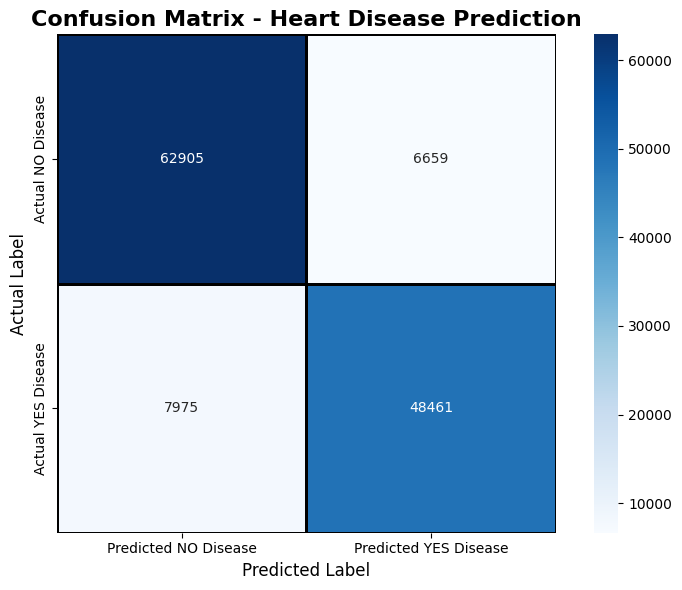

In [212]:
cm = confusion_matrix(y_test,predictions)

# Create the visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True,           # Show numbers in cells
            fmt='d',               # Integer format
            cmap='Blues',          # Color scheme
            cbar=True,             # Show color bar
            square=True,           # Square cells
            linewidths=1,          # Lines between cells
            linecolor='black',      # Line color
            xticklabels=['Predicted NO Disease', 'Predicted YES Disease'],
            yticklabels=['Actual NO Disease', 'Actual YES Disease'])

plt.title('Confusion Matrix - Heart Disease Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()